In [1]:
import tuw_nlp
tuw_nlp.download_alto()
tuw_nlp.download_definitions()

In [2]:
from tuw_nlp.grammar.text_to_4lang import TextTo4lang
from tuw_nlp.graph.utils import graph_to_pn

## 1. General usage

### Initialize TextTo4lang

The parameters are `language`, `nlp_cache`, `cache_dir`

In [3]:
tfl = TextTo4lang("en", "en_nlp_cache")

2023-02-06 18:48:50,627 : core (112) - INFO - Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2023-02-06 18:48:50,627 : core (123) - INFO - Use device: cpu
2023-02-06 18:48:50,627 : core (129) - INFO - Loading: tokenize
2023-02-06 18:48:50,650 : core (179) - INFO - Done loading processors!
2023-02-06 18:48:50,652 : common (213) - WARNING - Can not find mwt: default from official model list. Ignoring it.
2023-02-06 18:48:50,652 : core (112) - INFO - Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2023-02-06 18:48:50,653 : core (123) - INFO - Use device: cpu
2023-02-06 18:48:50,653 : core (129) - INFO - Loading: tokenize
2023-02-06 18:48:50,657 : core (129) - INFO - Loading: pos
2023-02-06 18:48:50,828 : core (129) - INFO - Loading: lemma
2023-02-06 18:48:50,858 

### Parsing a sentence

`TextTo4lang` can be called with a context manager, it only has 1 required parameter, the `text` itself:

In [4]:
fl_graphs = list(tfl("The suspect pushed the XXX into a deep YYY."))

### Displaying the graph

The `FourLang` can be converted to a dot format, which can be visualized with the graphviz package

In [5]:
from tuw_nlp.graph.fourlang import FourLang
from graphviz import Source

In [6]:
fl_graphs[0].G.nodes(data=True)

NodeDataView({0: {'name': 'push', 'token_id': 3}, 1: {'name': 'xxx', 'token_id': 5}, 2: {'name': 'suspect', 'token_id': 2}, 3: {'name': 'into', 'token_id': 6}, 4: {'name': 'yyy', 'token_id': 9}, 5: {'name': 'deep', 'token_id': 8}})

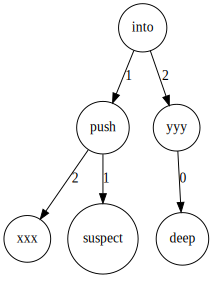

In [12]:
Source(fl_graphs[0].to_dot())

In [11]:
tfl.lexicon.get_definition("brown")

'A colour like that of chocolate or coffee.'

## 2. Expanding and Reducing a sentence

`TextTo4lang` has two optional parameters, `depth`, which indicates the recursion depth when expanding the graph, and `substitute`, which can be used to reduce the vocabulary of the graph by substituting the _expanded_ node with the root of its definition graph.

The default value for `depth` is 0, and `substitute` is set to _False_ by default.

In [13]:
fl_graphs = list(tfl("brown dog", depth=1, substitute=False))

2023-02-06 18:50:07,577 : alto (110) - INFO - running alto: java -Xmx32G -cp /Users/adamkovacs/tuw_nlp_resources/alto-2.3.6-SNAPSHOT-all.jar de.up.ling.irtg.script.ParsingEvaluator tmp/20230206_185007_521450/input.txt -g tmp/20230206_185007_521450/grammar.irtg -I ud -O fl=amr-sgraph-src -o tmp/20230206_185007_521450/output.txt
Processing tmp/20230206_185007_521450/input.txt (2 instances) ...
1 [ROOT(NOUN(_AMOD(ADJ(brown)),NOUN(dog)))           ] 67 ms
2 [dummy(dummy)                                      ] 861 μs
Done, total time: 100 ms
2023-02-06 18:50:08,431 : irtg (22) - INFO - loaded cache from cache/UD_FL.json with interpretations: ['fl', 'ud']
2023-02-06 18:50:08,433 : irtg (33) - INFO - updated cache in cache/UD_FL.json
2023-02-06 18:50:08,595 : alto (110) - INFO - running alto: java -Xmx32G -cp /Users/adamkovacs/tuw_nlp_resources/alto-2.3.6-SNAPSHOT-all.jar de.up.ling.irtg.script.ParsingEvaluator tmp/20230206_185008_869523/input.txt -g tmp/20230206_185008_869523/grammar.irtg -I

In [15]:
fl_graphs[0].G.nodes(data=True)

NodeDataView({6: {'name': 'dog', 'token_id': 2, 'expanded': True}, 7: {'name': 'brown', 'token_id': 1, 'expanded': True}, 8: {'name': 'COORD', 'token_id': None}, 9: {'name': 'familiari', 'token_id': 6}, 10: {'name': 'lupus', 'token_id': 5}, 11: {'name': 'Canis', 'token_id': 4}, 12: {'name': 'mammal', 'token_id': 2}, 13: {'name': 'domesticate', 'token_id': 11}, 14: {'name': 'appearance', 'token_id': 20}, 15: {'name': 'variable', 'token_id': 19}, 16: {'name': 'highly', 'token_id': 18}, 17: {'name': 'of', 'token_id': 5}, 18: {'name': 'year', 'token_id': 15}, 19: {'name': 'due', 'token_id': 21}, 20: {'name': 'breeding', 'token_id': 24}, 21: {'name': 'human', 'token_id': 23}, 22: {'name': 'that', 'token_id': 4}, 23: {'name': 'for', 'token_id': 12}, 24: {'name': 'thousand', 'token_id': 13}, 25: {'name': 'colour', 'token_id': 2}, 26: {'name': 'like', 'token_id': 3}, 27: {'name': 'coffee', 'token_id': 8}, 28: {'name': 'chocolate', 'token_id': 6}})

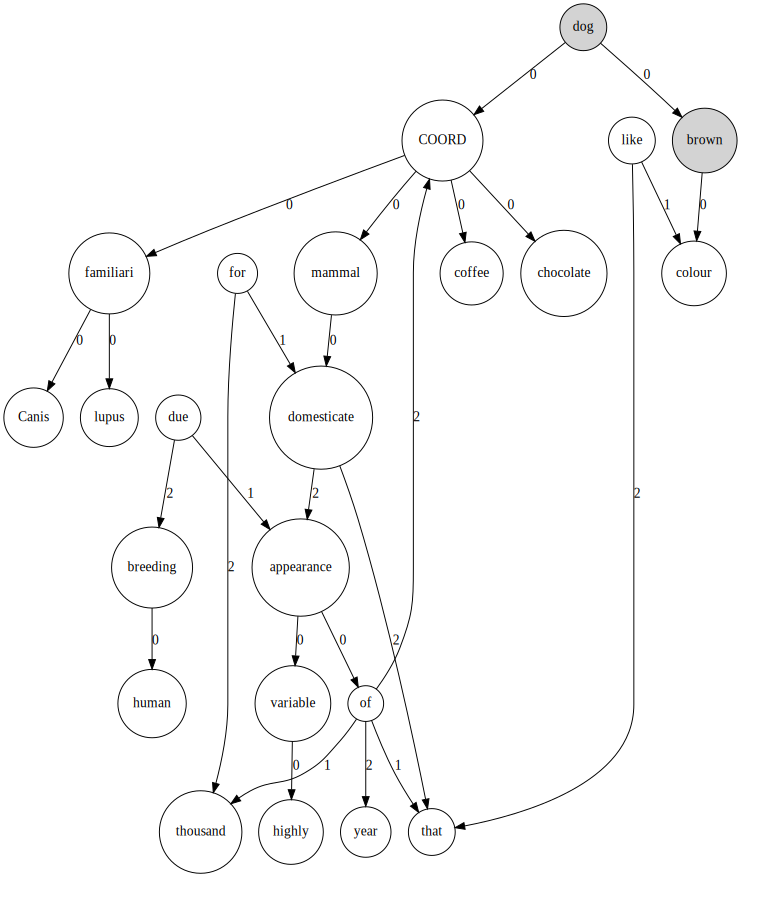

In [16]:
Source(fl_graphs[0].to_dot())

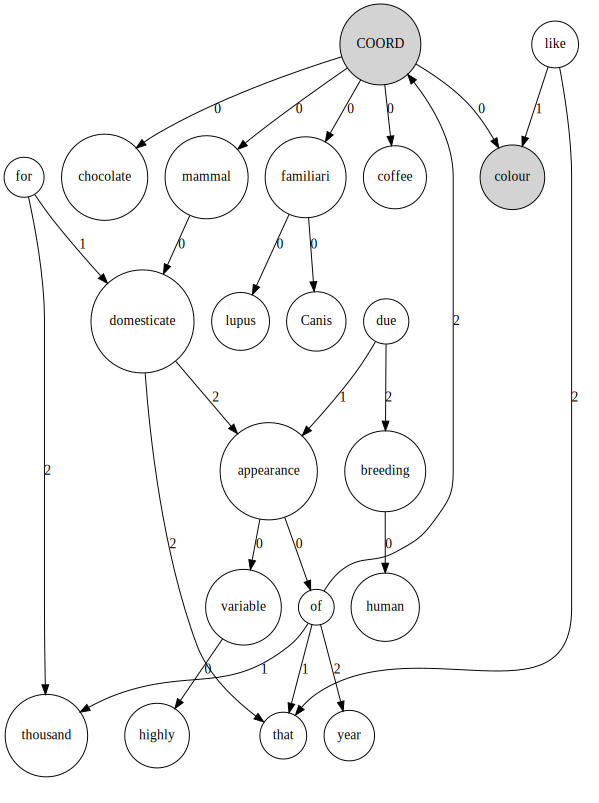

In [17]:
fl_graphs = list(tfl("brown dog", depth=1, substitute=True))
Source(fl_graphs[0].to_dot())

## 3. Using another language

Currently, besides English, TextTo4lang can be used with German as well

In [ ]:
tfl = TextTo4lang("de", "de_nlp_cache")

In [ ]:
fl_graphs = list(tfl("brauner Hund", depth=1, substitute=False))

In [ ]:
Source(fl_graphs[0].to_dot())

In [20]:
tfl.lexicon.get_definition("braun")

## Using other formalism

In [21]:
from tuw_nlp.grammar.text_to_sdp import TextToSDP

In [22]:
tsdp = TextToSDP()

2023-02-06 18:52:06,520 : core (112) - INFO - Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2023-02-06 18:52:06,522 : core (123) - INFO - Use device: cpu
2023-02-06 18:52:06,522 : core (129) - INFO - Loading: tokenize
2023-02-06 18:52:06,528 : core (179) - INFO - Done loading processors!
2023-02-06 18:52:06,530 : common (213) - WARNING - Can not find mwt: default from official model list. Ignoring it.
2023-02-06 18:52:06,530 : core (112) - INFO - Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2023-02-06 18:52:06,531 : core (123) - INFO - Use device: cpu
2023-02-06 18:52:06,531 : core (129) - INFO - Loading: tokenize
2023-02-06 18:52:06,537 : core (129) - INFO - Loading: pos
2023-02-06 18:52:06,763 : core (129) - INFO - Loading: lemma
2023-02-06 18:52:06,799 

In [31]:
sdp_graphs = list(tsdp("This is a test sentence."))

/Users/adamkovacs/opt/miniconda3/envs/potato/lib/python3.10/site-packages/torch/nn/modules/rnn.py:26: UserWarning: apply_permutation is deprecated, please use tensor.index_select(dim, permutation) instead
  warnings.warn("apply_permutation is deprecated, please use tensor.index_select(dim, permutation) instead")


In [32]:
sdp_graphs[0]

In [33]:
graph = sdp_graphs[0]

In [34]:
graph.G.edges(data=True)

OutEdgeDataView([(2, 1, {'color': 'ARG1'}), (2, 5, {'color': 'ARG2'}), (3, 5, {'color': 'BV'}), (4, 5, {'color': 'compound'})])

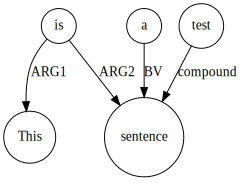

In [35]:
from graphviz import Source

Source(graph.to_dot())

In [36]:
graph.G.nodes(data=True)

NodeDataView({1: {'name': 'This', 'token_id': 0, 'lemma': 'this', 'upos': 'PRON'}, 2: {'name': 'is', 'token_id': 1, 'lemma': 'be', 'upos': 'AUX'}, 3: {'name': 'a', 'token_id': 2, 'lemma': 'a', 'upos': 'DET'}, 4: {'name': 'test', 'token_id': 3, 'lemma': 'test', 'upos': 'NOUN'}, 5: {'name': 'sentence', 'token_id': 4, 'lemma': 'sentence', 'upos': 'NOUN'}, 6: {'name': '.', 'token_id': 5, 'lemma': '.', 'upos': 'PUNCT'}})